# Tubes Probabilitas dan Statistika
Bab II - PENGUJIAN HIPOTESIS STATISTIK SATU ARAH DAN DUA ARAH

### Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm
import statistics
import math

### checking Directory

In [2]:
#print directory
print(os.listdir())

['.ipynb_checkpoints', 'bab3.rar', 'file tubes', 'heart.csv', 'population3_data.xlsx', 'probstat3_2019.csv', 'sample3_data.xlsx', 'Tubes Probstat.ipynb', '~$population3_data.xlsx', '~$sample3_data.xlsx']


### Loading some dataset

In [3]:
data = pd.read_csv("./heart.csv")
print("Table size = ", data.shape)
print(data.columns)


Table size =  (303, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


### Data cleansing

In [4]:

data_clean = data[['age', 'trestbps']]
data_clean.sort_values(by=['age'], inplace=True)
data_clean = data_clean[data_clean['age'].between(30, 50)]
print(data_clean)
data_clean.describe()


     age  trestbps
58    34       118
125   34       118
239   35       126
65    35       138
227   35       120
..   ...       ...
104   50       129
188   50       140
184   50       150
257   50       144
15    50       120

[94 rows x 2 columns]


<ipython-input-4-1059654b24f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.sort_values(by=['age'], inplace=True)


,age,trestbps
count,94.000000,94.000000
mean,43.553191,124.606383
std,4.094625,12.698504
min,34.000000,94.000000
25%,41.000000,115.750000
50%,44.000000,122.000000
75%,46.750000,133.500000
max,50.000000,152.000000


In [5]:
variansi_bps = data_clean.var()['trestbps']
average_bps = data_clean.mean()['trestbps']
std_bps = data_clean.std()['trestbps']
print("Variansi Populasi Tekanan darah = ", str(variansi_bps))
print("Rata-rata Populasi Tekanan darah = ", str(average_bps))

Variansi Populasi Tekanan darah =  161.25200183024486
Rata-rata Populasi Tekanan darah =  124.6063829787234


In [6]:
sqrt = 157.5517 ** 0.5
print(sqrt)

12.551960006309772


In [7]:
#perhitungan Z
zh = 124.862-124.606383
dzh = 12.55196 / (30**0.5)
print(zh/dzh)

0.11154209938670816


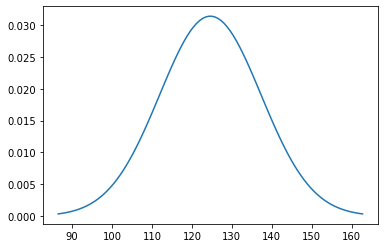

In [8]:
mu = average_bps
variance = variansi_bps
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.show()

C:\Users\Gremlinflat\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tekanan Darah', ylabel='Density'>

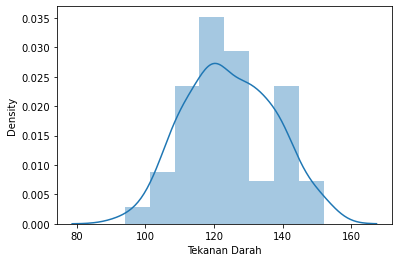

In [9]:
x_axis = pd.Series(data_clean['trestbps'], name="Tekanan Darah")
sns.distplot(x_axis)

In [10]:
def draw_z_score(x, cond, mu, sigma, title, point):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma), color='red')
    plt.title(title)
    plt.scatter(point,0, color='green')
    plt.show()
def draw_z_score2(x, cond1, cond2, mu, sigma, title, point):
    y = norm.pdf(x, mu, sigma)
    z1 = x[cond1]
    z2 = x[cond2]
    plt.plot(x, y)
    plt.fill_between(z1, 0, norm.pdf(z1, mu, sigma), color='red')
    plt.fill_between(z2, 0, norm.pdf(z2, mu, sigma), color='red')
    plt.title(title)
    plt.scatter(point, 0, color='green')
    plt.show()

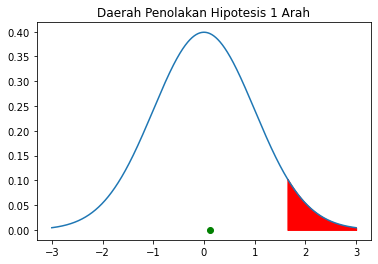

In [11]:
x = np.arange(-3,3,0.0001)
z0 = 1.645
z_hypo = 0.1115420993
draw_z_score(x, x>z0, 0, 1, 'Daerah Penolakan Hipotesis 1 Arah', z_hypo)

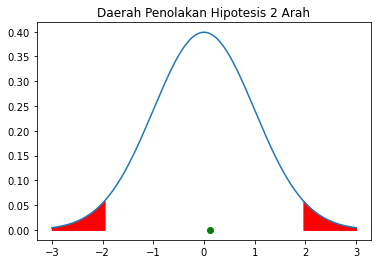

In [12]:
x = np.arange(-3,3,0.0001)
z0 = 1.96
z_hypo = 0.1115420993
draw_z_score2(x, (x<z0*-1), (x>z0), 0, 1, 'Daerah Penolakan Hipotesis 2 Arah', z_hypo)

# Tubes Probabilitas dan Statistika
Bab III - ANALISIS REGRESI LINIER

### load data

In [13]:
data3 = pd.read_csv("./probstat3_2019.csv")
print("Table size = ", data3.shape)
print(data3.columns)

Table size =  (156, 9)
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


### Data cleansing

In [14]:
data3_clean = data3[['Country or region', 'GDP per capita', 'Score']]
print(data3_clean)
indonesia = data3_clean.loc[(data3_clean['Country or region'] == "Indonesia")]
print(indonesia)
data3_clean.describe()
#data3_clean.to_excel('population3_data.xlsx')

            Country or region  GDP per capita  Score
0                     Finland           1.340  7.769
1                     Denmark           1.383  7.600
2                      Norway           1.488  7.554
3                     Iceland           1.380  7.494
4                 Netherlands           1.396  7.488
..                        ...             ...    ...
151                    Rwanda           0.359  3.334
152                  Tanzania           0.476  3.231
153               Afghanistan           0.350  3.203
154  Central African Republic           0.026  3.083
155               South Sudan           0.306  2.853

[156 rows x 3 columns]
   Country or region  GDP per capita  Score
91         Indonesia           0.931  5.192


,GDP per capita,Score
count,156.000000,156.000000
mean,0.905147,5.407096
std,0.398389,1.113120
min,0.000000,2.853000
25%,0.602750,4.544500
50%,0.960000,5.379500
75%,1.232500,6.184500
max,1.684000,7.769000


In [15]:
samp = data3_clean.sample(n=30)
#samp.to_excel('sample3_data.xlsx')
print(samp)

          Country or region  GDP per capita  Score
1                   Denmark           1.383  7.600
52                   Latvia           1.187  5.940
69                   Serbia           1.004  5.603
103                   Gabon           1.057  4.799
35                    Italy           1.294  6.223
91                Indonesia           0.931  5.192
65                 Portugal           1.221  5.693
16                  Germany           1.373  6.985
6                    Sweden           1.387  7.343
26                Guatemala           0.800  6.436
42                 Colombia           0.985  6.125
40               Uzbekistan           0.745  6.174
137                  Zambia           0.578  4.107
57                    Japan           1.327  5.886
94                   Bhutan           0.813  5.082
133                Ethiopia           0.336  4.286
118                 Georgia           0.886  4.519
106                 Albania           0.947  4.719
77   Bosnia and Herzegovina    

In [23]:
#creating artificial table
subject = pd.Series(data3_clean['Country or region'])
x = pd.Series(data3_clean['GDP per capita'])
y = pd.Series(data3_clean['Score'])
y_square = pd.Series([i ** 2 for i in y])
x_square = pd.Series([i ** 2 for i in x])
x_y = pd.Series([x[i] * y[i] for i in range(len(x))])
data = pd.DataFrame({'Country or region' : subject, 'X' : x, 'Y' : y, 'X^2' : x_square, 'Y^2' : y_square, 'XY' : x_y})
print(data)
#data.to_excel('population3_data.xlsx')
n = 156
#y=mx+c
m = ( n * data['XY'].sum() - data['X'].sum() * data['Y'].sum() ) / ( n * data['X^2'].sum() - data['X'].sum() ** 2)
c = (data['Y'].sum() * data['X^2'].sum() - data['X'].sum() * data['XY'].sum()) / (n * data['X^2'].sum() - data['X'].sum() ** 2)
print("b =  ", m)
print("a =  ", c)

            Country or region      X      Y       X^2        Y^2         XY
0                     Finland  1.340  7.769  1.795600  60.357361  10.410460
1                     Denmark  1.383  7.600  1.912689  57.760000  10.510800
2                      Norway  1.488  7.554  2.214144  57.062916  11.240352
3                     Iceland  1.380  7.494  1.904400  56.160036  10.341720
4                 Netherlands  1.396  7.488  1.948816  56.070144  10.453248
..                        ...    ...    ...       ...        ...        ...
151                    Rwanda  0.359  3.334  0.128881  11.115556   1.196906
152                  Tanzania  0.476  3.231  0.226576  10.439361   1.537956
153               Afghanistan  0.350  3.203  0.122500  10.259209   1.121050
154  Central African Republic  0.026  3.083  0.000676   9.504889   0.080158
155               South Sudan  0.306  2.853  0.093636   8.139609   0.873018

[156 rows x 6 columns]
b =   2.2181480010083603
a =   3.399345178292416


In [22]:

print("∑XY = ", data['XY'].sum())
print("∑X = ", data['X'].sum())
print("∑Y = ", data['Y'].sum())
print("∑X^2 = ", data['X^2'].sum())
print("(∑X)^2 = ", data['X'].sum() ** 2)
print("∑Y^2 = ", data['Y^2'].sum())
print("(∑Y)^2 = ", data['Y'].sum() ** 2)

#R
r = (n * data['XY'].sum() - data['X'].sum() * data['Y'].sum()) 
r /= (math.sqrt((n * data['X^2'].sum() - data['X'].sum() ** 2) * (n * data['Y^2'].sum() - data['Y'].sum() ** 2)))
print("R = ", r)

∑XY =  818.066182
∑X =  141.203
∑Y =  843.507
∑X^2 =  152.41022900000002
(∑X)^2 =  19938.287209000002
∑Y^2 =  4752.974011
(∑Y)^2 =  711504.0590489999
R =  0.7938828678781272


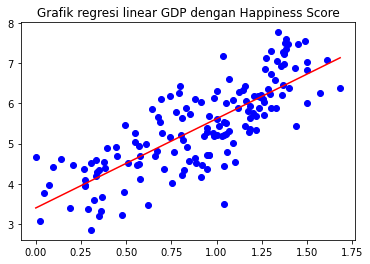

In [43]:
#print((m, c))
def get_prediction(x):
  return m*x + c

#inp = data
#print(inp)
x_plot = np.linspace(data['X'].min(), data['X'].max())
#indo_x = 0.931
#plt.plot(indo_x, get_prediction(indo_x), 'ro') # predictions (Red Dot)
plt.plot(inp['X'], inp['Y'], 'bo') # input data (Blue Dot)
plt.plot(x_plot, get_prediction(x_plot), 'r') # Line
plt.title('Grafik regresi linear GDP dengan Happiness Score')
plt.show()

   Country or region  GDP per capita  Score
91         Indonesia           0.931  5.192

Actual Happiness Score Indonesia = 5.192
Predicted Happiness Score Indonesia = 5.464441


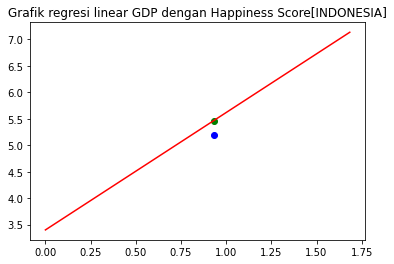

In [39]:
x_plot = np.linspace(data['X'].min(), data['X'].max())
indo_x = 0.931
indonesia = data3_clean.loc[(data3_clean['Country or region'] == "Indonesia")]
print(indonesia)
print()
print("Actual Happiness Score Indonesia = 5.192")
print("Predicted Happiness Score Indonesia = 5.464441")

plt.plot(indonesia['GDP per capita'], get_prediction(indonesia['GDP per capita']), 'go') # predictions (Red Dot)

#plt.plot(inp['X'], inp['Y'], 'bo') # input data (Blue Dot)
plt.plot(indonesia['GDP per capita'], indonesia['Score'], 'bo')
plt.plot(x_plot, get_prediction(x_plot), 'r') # Line
plt.title('Grafik regresi linear GDP dengan Happiness Score[INDONESIA]')
plt.show()

In [42]:
t1 = 0.7938828678781272 * math.sqrt(154)
t2 = math.sqrt( (1-0.7938828678781272))
t = t1/t2
print(t)

21.70000054478138
